# Лабораторная работа №6. Многоскоростная обработка сигналов.

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def dtft(x, M=2048):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (np.fft.fftshift(np.fft.fftfreq(M, d=1)), np.fft.fftshift(np.fft.fft(x, M)))

In [2]:
#%matplotlib inline

In [3]:
#%matplotlib notebook

# Модуль 1. Интерполяция сигналов.

## Задача 1.1. Интерполяция сигналов с помощью ДПФ.


Пусть некоторый периодический сигнал $y(t)$ был дискретизован в соответствии с теоремой Котельникова,  $x[k]$ — один период получившейся последовательности отсчетов. Произведите интерполяцию с коэффициентом $L=5$ путем добавления нулей в середину ДПФ сигнала $x[k]$. Объясните, почему восстановление сигнала в данном случае точное.

| Вариант 	| 	&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; x(k)  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | &nbsp;  N 	|
|:-------:	|:-------------------------------------------------------:	|:--:	|
| 1 	| $ \cos{\left (\dfrac{3 \pi}{5} k \right )} + 4 \cos{\left (\dfrac{4 \pi}{5} k \right )} $ 	| 10 	|
| 2 	| $ 0.2 \cos{\left (\dfrac{\pi k}{4} \right )} + \cos{\left (\dfrac{3 \pi}{4} k \right )} $ 	| 8 	|
| 3 	| $ \cos{\left (\dfrac{\pi k}{5} \right )} + 3 \cos{\left (\dfrac{4 \pi}{5} k \right )} $ 	| 10 	|
| 4 	| $ 0.1 \cos{\left (\dfrac{\pi k}{4} \right )} + \cos{\left (\dfrac{3 \pi}{4} k \right )} $ 	| 8 	|
| 5 	| $ \cos{\left (\dfrac{2 \pi}{5} k \right )} + 6 \cos{\left (\dfrac{3 \pi}{5} k \right )} $ 	| 10 	|
| 6 	| $ 0.1 \cos{\left (\dfrac{\pi k}{5} \right )} + \cos{\left (\dfrac{4 \pi}{5} k \right )} $ 	| 10 	|

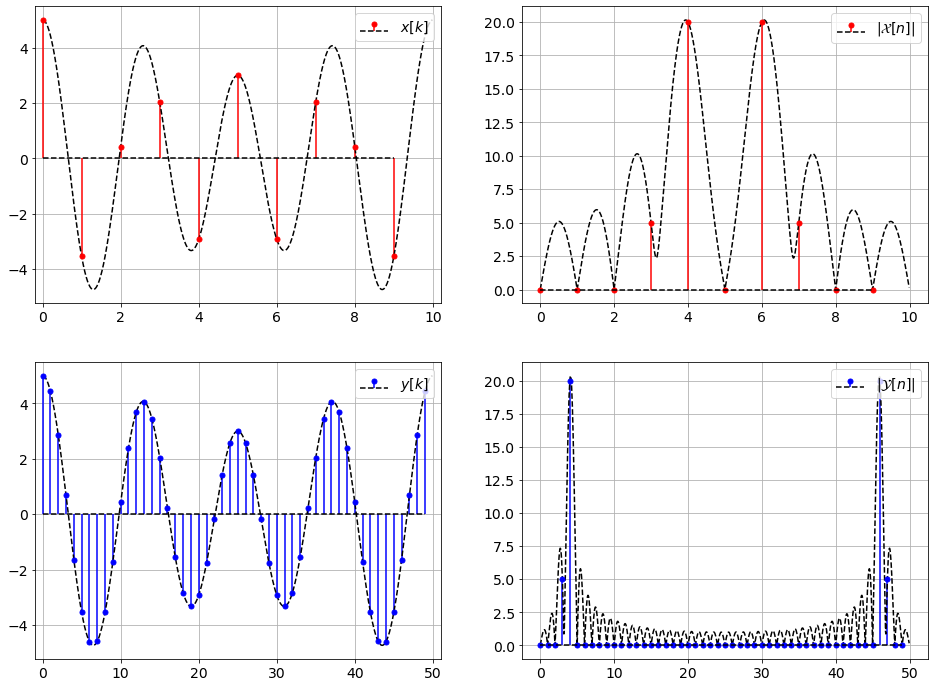

In [4]:
N = 10
L = 5
k = np.arange(N)
x = np.cos(3*np.pi*k/5) + 4*np.cos(4*np.pi*k/5)
X = np.fft.fft(x)
Y = np.hstack((X[:N//2], np.zeros(N*(L-1)), X[N//2:]))
y = np.fft.ifft(Y).real * L

M = 1000
t = np.cos(6*np.pi*np.arange(M)/M) + 4*np.cos(8*np.pi*np.arange(M)/M)

plt.rcParams.update({'font.size': 14})

plt.subplots(2, 2, figsize = (16, 12))
plt.subplot(2, 2, 1)
plt.plot(np.arange(M) *(N/M), t, 'k--')
ml, sl, bl = plt.stem(k, x, 'r', basefmt = 'k--', markerfmt = 'o' + 'r', label='$x[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.xlim(-0.2, N+0.2)
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 2)
plt.plot(np.arange(M) * (N/M), abs(np.fft.fft(x, M)), 'k--')
ml, sl, bl = plt.stem(k, abs(X), 'r', basefmt = 'k--', markerfmt = 'o' + 'r', label='$|\mathcal{X}[n]|$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 3)
plt.plot(np.arange(M) *(N*L/M), t, 'k--')
ml, sl, bl = plt.stem(np.arange(N*L), y, 'b', basefmt = 'k--', markerfmt = 'o' + 'b', label='$y[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.xlim(-1, N*L+1)
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 4)
plt.plot(np.arange(M) * (N*L/M), abs(np.fft.fft(y, M))/L, 'k--')
ml, sl, bl = plt.stem(np.arange(N*L), abs(Y), 'b', basefmt = 'k--', markerfmt = 'o' + 'b', label='$|\mathcal{Y}[n]|$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')

plt.show()

# Имеем ровно один период с локализованным спектром в требуемой полосе, поэтому сигнал можно восстановить.

## Задача 1.2. Система однократной интерполяции.

Промоделируйте работу системы однократной интерполяции с коэффицентом $L$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 31$, $\nu_1=0,125$, $\nu_2=2\nu_1$ с помощью функции ``scipy.signal.upfirdn()``

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $L$ |2 | 4 | 8 | 2 | 4 | 8|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор КИХ-фильтра для системы интерполяции. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) сигнала $q[k]$, получаемого добавлением $L-1$ отсчета между каждой парой исходных отсчетов,

* в) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$, $h[k]$, $q[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

4) Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы интерполяции. 



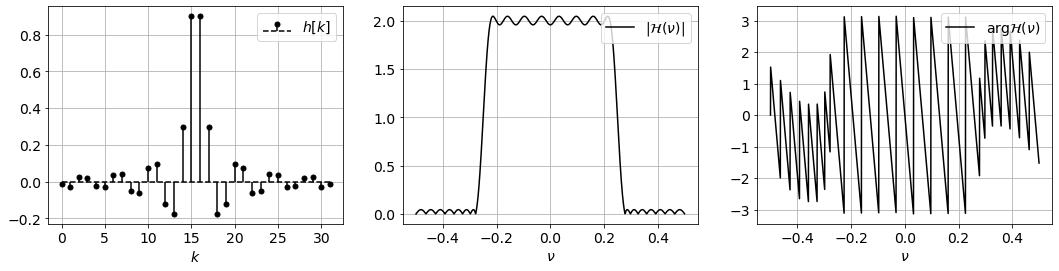

In [5]:
L = 2
f_s = 200
N = 32

h = signal.remez(numtaps=N, bands=[0, f_s/(2*L)-5, f_s/(2*L)+5, f_s/2], desired=[L, 0], weight=[1, 1], fs=f_s)

plt.subplots(1, 3, figsize=(18, 4))
plt.subplot(1, 3, 1)
ml, sl, bl = plt.stem(np.arange(h.size), h, 'k', basefmt = 'k--', markerfmt = 'o' + 'k', label='$h[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = dtft(h)
plt.subplot(1, 3, 2)
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(1, 3, 3)
plt.plot(nu, np.angle(H), 'k', label='arg$\mathcal{H}(\\nu)$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()

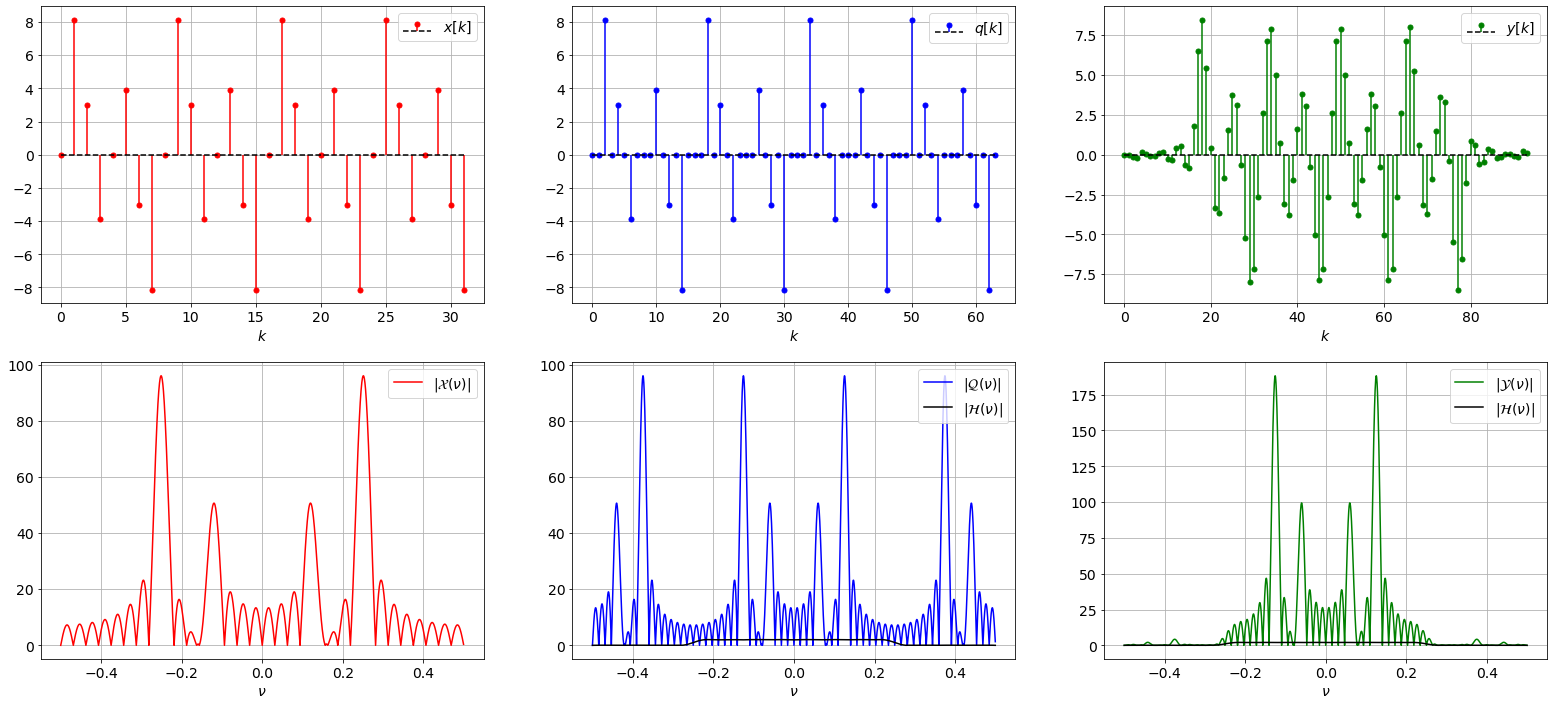

In [6]:
k = np.arange(N)
x = 3*np.sin(2*np.pi*0.125*k) + 6*np.sin(2*np.pi*0.25*k)
q = np.zeros(N*L)
q[::L] = x
y = signal.upfirdn(h, x, up=L)

plt.subplots(2, 3, figsize=(27, 12))
plt.subplot(2, 3, 1)
ml, sl, bl = plt.stem(np.arange(x.size), x, 'r', basefmt = 'k--', markerfmt = 'o' + 'r', label='$x[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(2, 3, 2)
ml, sl, bl = plt.stem(np.arange(q.size), q, 'b', basefmt = 'k--', markerfmt = 'o' + 'b', label='$q[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(2, 3, 3)
ml, sl, bl = plt.stem(np.arange(y.size), y, 'g', basefmt = 'k--', markerfmt = 'o' + 'g', label='$y[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = dtft(h)
nu_x, X = dtft(x)
nu_q, Q = dtft(q)
nu_y, Y = dtft(y)


plt.subplot(2, 3, 4)
plt.plot(nu_x, abs(X), 'r', label='$|\mathcal{X}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(2, 3, 5)
plt.plot(nu_q, abs(Q), 'b', label='$|\mathcal{Q}(\\nu)|$')
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(2, 3, 6)
plt.plot(nu_y, abs(Y), 'g', label='$|\mathcal{Y}(\\nu)|$')
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()
## f_s' = L*f_s = 400, T_s' = 1/f_s' = 1/400

## Задача 1.3. Интерполяция первого и нулевого порядка.

Повторите вычисления задачи 1.2 для КИХ-фильтров с импульсными характеристиками ${{h}_{0}}[k]$ и ${{h}_{1}}[k]$ и $L=2$. Сравните результаты.

${{h}_{0}}[k]=\left\{ \begin{matrix}
   1,\ \ \text{ при }k=0,\ \ 1,  \\
   0,\ \ \text{ при других }k.  \\
\end{matrix} \right.$

${{h}_{1}}[k]=\left\{ \begin{matrix}
   0,5,\ \ \text{ при }k=0,\ \ 2,  \\
   1,\ \ \text{ при }k=1,  \\
   0,\ \ \text{ при других  }k.  \\
\end{matrix} \right.$



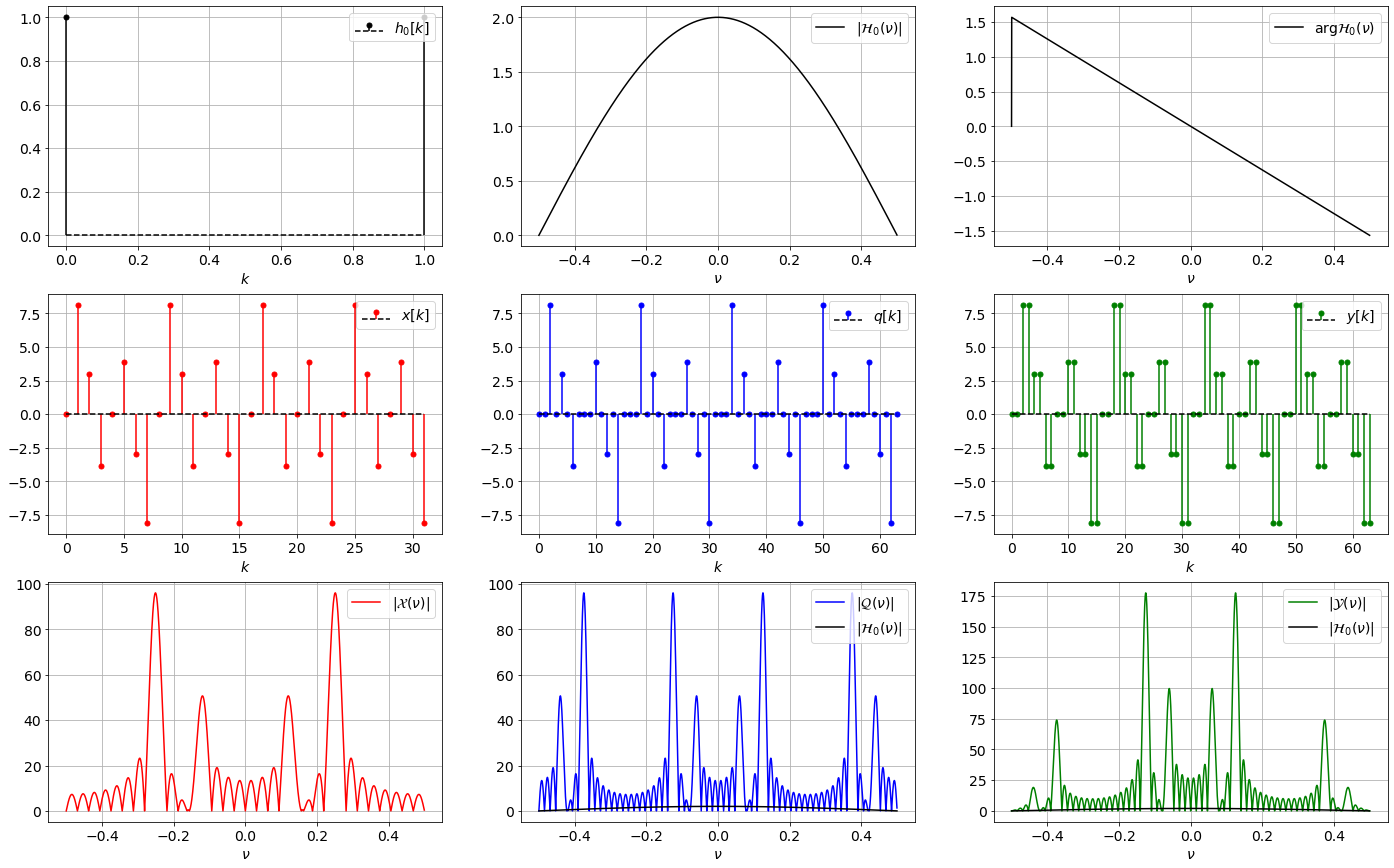

In [7]:
k = np.arange(N)
h = np.ones(2)

plt.subplots(3, 3, figsize=(24, 15))
plt.subplot(3, 3, 1)
ml, sl, bl = plt.stem(np.arange(h.size), h, 'k', basefmt = 'k--', markerfmt = 'o' + 'k', label='$h_0[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = dtft(h)
plt.subplot(3, 3, 2)
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}_0(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(3, 3, 3)
plt.plot(nu, np.angle(H), 'k', label='arg$\mathcal{H}_0(\\nu)$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')


x = 3*np.sin(2*np.pi*0.125*k) + 6*np.sin(2*np.pi*0.25*k)
q = np.zeros(N*L)
q[::L] = x
y = signal.upfirdn(h, x, up=L)


plt.subplot(3, 3, 4)
ml, sl, bl = plt.stem(np.arange(x.size), x, 'r', basefmt = 'k--', markerfmt = 'o' + 'r', label='$x[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(3, 3, 5)
ml, sl, bl = plt.stem(np.arange(q.size), q, 'b', basefmt = 'k--', markerfmt = 'o' + 'b', label='$q[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(3, 3, 6)
ml, sl, bl = plt.stem(np.arange(y.size), y, 'g', basefmt = 'k--', markerfmt = 'o' + 'g', label='$y[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = dtft(h)
nu_x, X = dtft(x)
nu_q, Q = dtft(q)
nu_y, Y = dtft(y)


plt.subplot(3, 3, 7)
plt.plot(nu_x, abs(X), 'r', label='$|\mathcal{X}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(3, 3, 8)
plt.plot(nu_q, abs(Q), 'b', label='$|\mathcal{Q}(\\nu)|$')
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}_0(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(3, 3, 9)
plt.plot(nu_y, abs(Y), 'g', label='$|\mathcal{Y}(\\nu)|$')
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}_0(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()

# Наблюдается повторение отсчётов

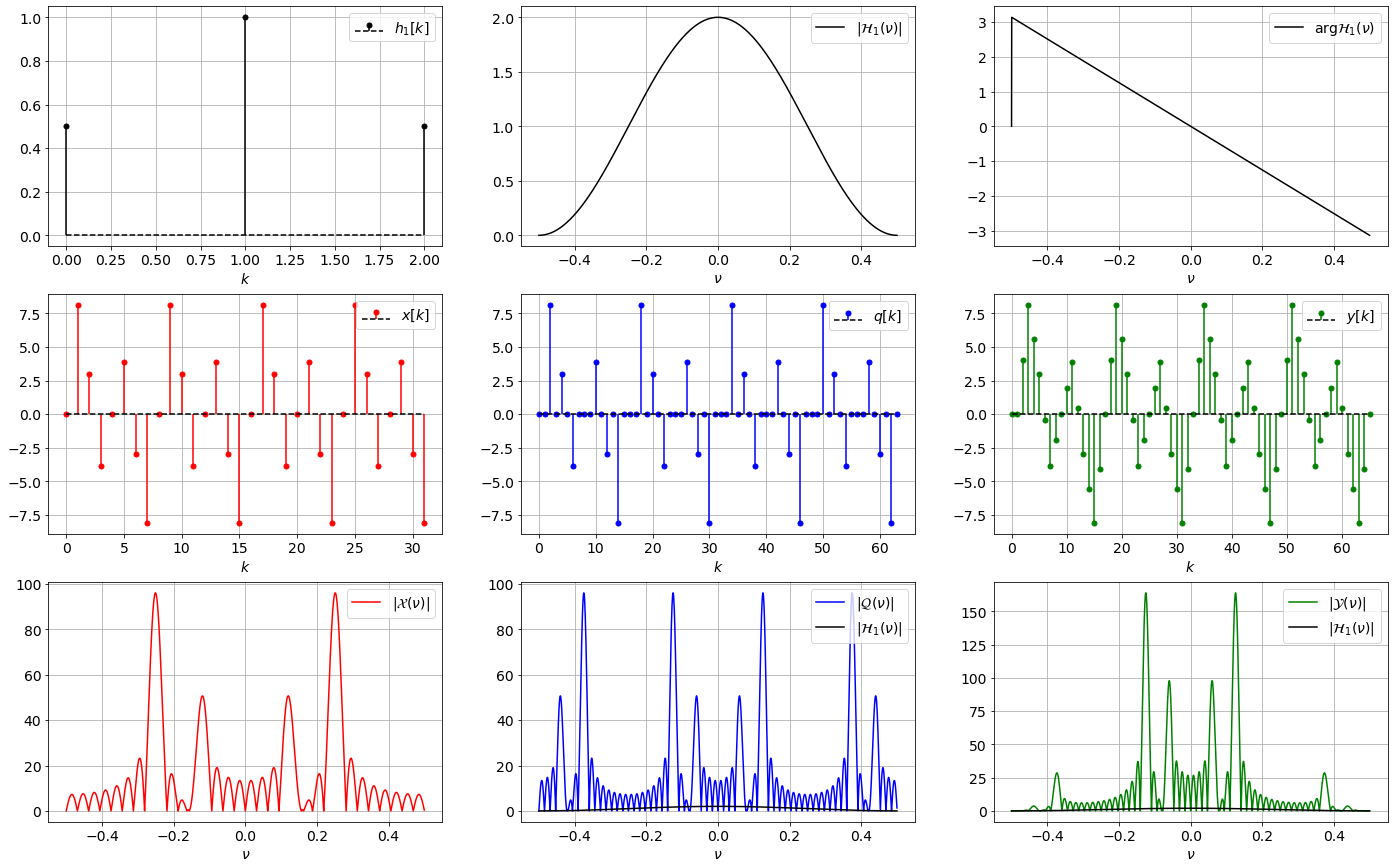

In [8]:
k = np.arange(N)
h = np.array([0.5, 1., 0.5])

plt.subplots(3, 3, figsize=(24, 15))
plt.subplot(3, 3, 1)
ml, sl, bl = plt.stem(np.arange(h.size), h, 'k', basefmt = 'k--', markerfmt = 'o' + 'k', label='$h_1[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = dtft(h)
plt.subplot(3, 3, 2)
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}_1(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(3, 3, 3)
plt.plot(nu, np.angle(H), 'k', label='arg$\mathcal{H}_1(\\nu)$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')


x = 3*np.sin(2*np.pi*0.125*k) + 6*np.sin(2*np.pi*0.25*k)
q = np.zeros(N*L)
q[::L] = x
y = signal.upfirdn(h, x, up=L)


plt.subplot(3, 3, 4)
ml, sl, bl = plt.stem(np.arange(x.size), x, 'r', basefmt = 'k--', markerfmt = 'o' + 'r', label='$x[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(3, 3, 5)
ml, sl, bl = plt.stem(np.arange(q.size), q, 'b', basefmt = 'k--', markerfmt = 'o' + 'b', label='$q[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(3, 3, 6)
ml, sl, bl = plt.stem(np.arange(y.size), y, 'g', basefmt = 'k--', markerfmt = 'o' + 'g', label='$y[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = dtft(h)
nu_x, X = dtft(x)
nu_q, Q = dtft(q)
nu_y, Y = dtft(y)


plt.subplot(3, 3, 7)
plt.plot(nu_x, abs(X), 'r', label='$|\mathcal{X}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(3, 3, 8)
plt.plot(nu_q, abs(Q), 'b', label='$|\mathcal{Q}(\\nu)|$')
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}_1(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(3, 3, 9)
plt.plot(nu_y, abs(Y), 'g', label='$|\mathcal{Y}(\\nu)|$')
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}_1(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()

# Наблюдается линейная интерполяция исходного сигнала

#  Модуль 2. Прореживание сигналов.

## Задача 2.1. Система однократной децимации.

Промоделируйте работу системы однократной децимации с коэффицентом $M$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 127$, $\nu_1=1/64$, $\nu_2=2\nu_1$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $M$ |2 | 4 | 8 | 2 | 4 | 8|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор фильтра для системы децимации. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

4) Пусть частота дискретизации входного сигнала системы однокраной децимации равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 

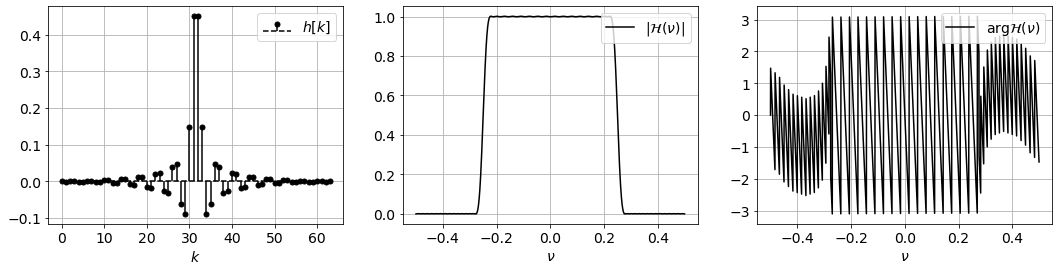

In [9]:
N = 128
M = 2
f_s = 200

h = signal.remez(numtaps=N//M, bands=[0, f_s/(2*M)-5, f_s/(2*M)+5, f_s/2], desired=[1., 0], weight=[1, 1], fs=f_s)

plt.subplots(1, 3, figsize=(18, 4))
plt.subplot(1, 3, 1)
ml, sl, bl = plt.stem(np.arange(h.size), h, 'k', basefmt = 'k--', markerfmt = 'o' + 'k', label='$h[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = dtft(h)
plt.subplot(1, 3, 2)
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(1, 3, 3)
plt.plot(nu, np.angle(H), 'k', label='arg$\mathcal{H}(\\nu)$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()

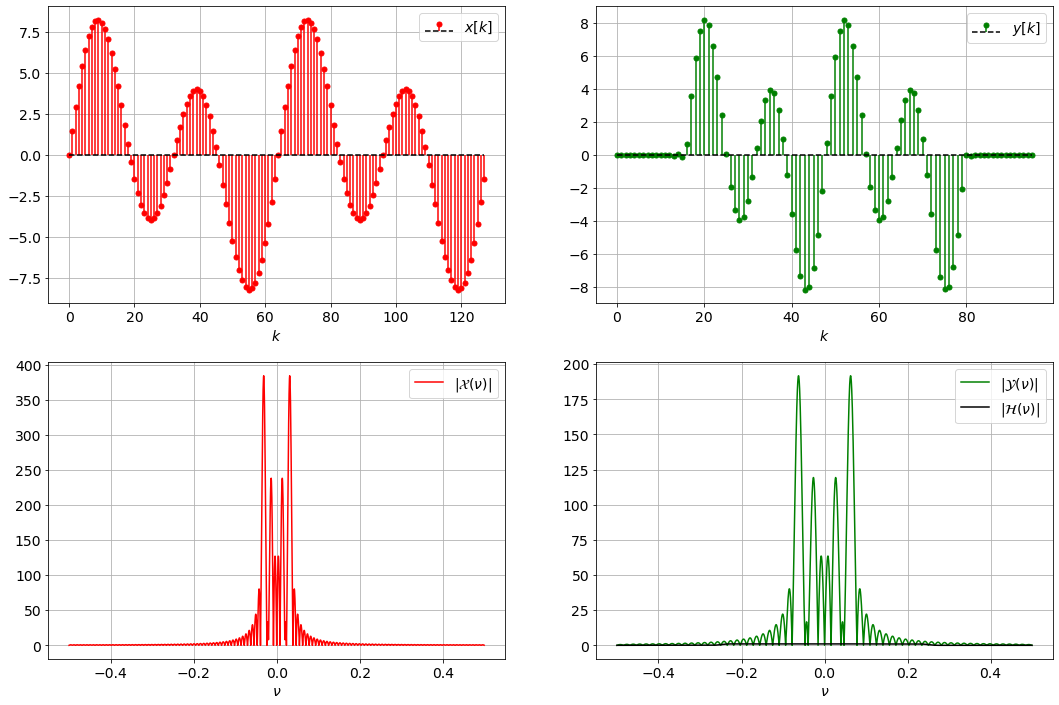

In [10]:
k = np.arange(N)
x = 3*np.sin(2*np.pi*1./64*k) + 6*np.sin(2*np.pi*2./64*k)
y = signal.upfirdn(h, x, down=M)

plt.subplots(2, 2, figsize=(18, 12))
plt.subplot(2, 2, 1)
ml, sl, bl = plt.stem(np.arange(x.size), x, 'r', basefmt = 'k--', markerfmt = 'o' + 'r', label='$x[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(2, 2, 2)
ml, sl, bl = plt.stem(np.arange(y.size), y, 'g', basefmt = 'k--', markerfmt = 'o' + 'g', label='$y[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = dtft(h)
nu_x, X = dtft(x)
nu_y, Y = dtft(y)


plt.subplot(2, 2, 3)
plt.plot(nu_x, abs(X), 'r', label='$|\mathcal{X}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')


plt.subplot(2, 2, 4)
plt.plot(nu_y, abs(Y), 'g', label='$|\mathcal{Y}(\\nu)|$')
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()
## f_s' = f_s/M = 100, T_s' = 1/f_s' = 1/100

## Задача 2.2. Система однократной передискретизации с рациональным шагом.

Промоделируйте работу системы однократной передискретизации с коэффицентом $L/M=5/2$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 63$, $\nu_1=0,0625$, $\nu_2=2\nu_1$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор фильтра для однократной передискретизации. Изобразите на графиках его АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы передискретизации во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы передискретизации во частотной области.

4) Пусть частота дискретизации входного сигнала системы равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 

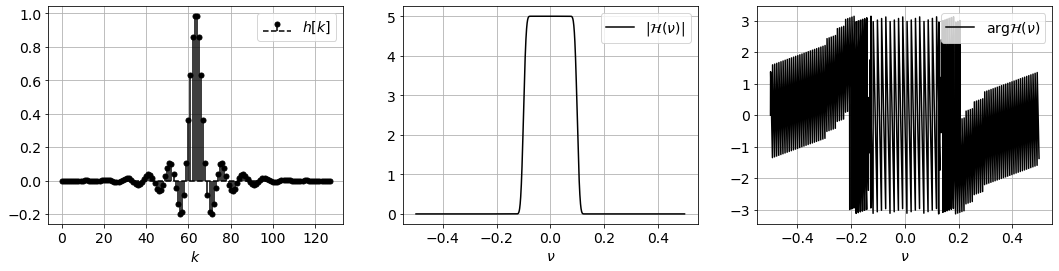

In [11]:
N = 128
L = 5
M = 2
f_s = 200

h = signal.remez(numtaps=N, bands=[0, f_s/(2*max(L, M))-5, f_s/(2*max(L, M))+5, f_s/2], desired=[L, 0], weight=[1, 1], fs=f_s)

plt.subplots(1, 3, figsize=(18, 4))
plt.subplot(1, 3, 1)
ml, sl, bl = plt.stem(np.arange(h.size), h, 'k', basefmt = 'k--', markerfmt = 'o' + 'k', label='$h[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = dtft(h)
plt.subplot(1, 3, 2)
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.subplot(1, 3, 3)
plt.plot(nu, np.angle(H), 'k', label='arg$\mathcal{H}(\\nu)$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()

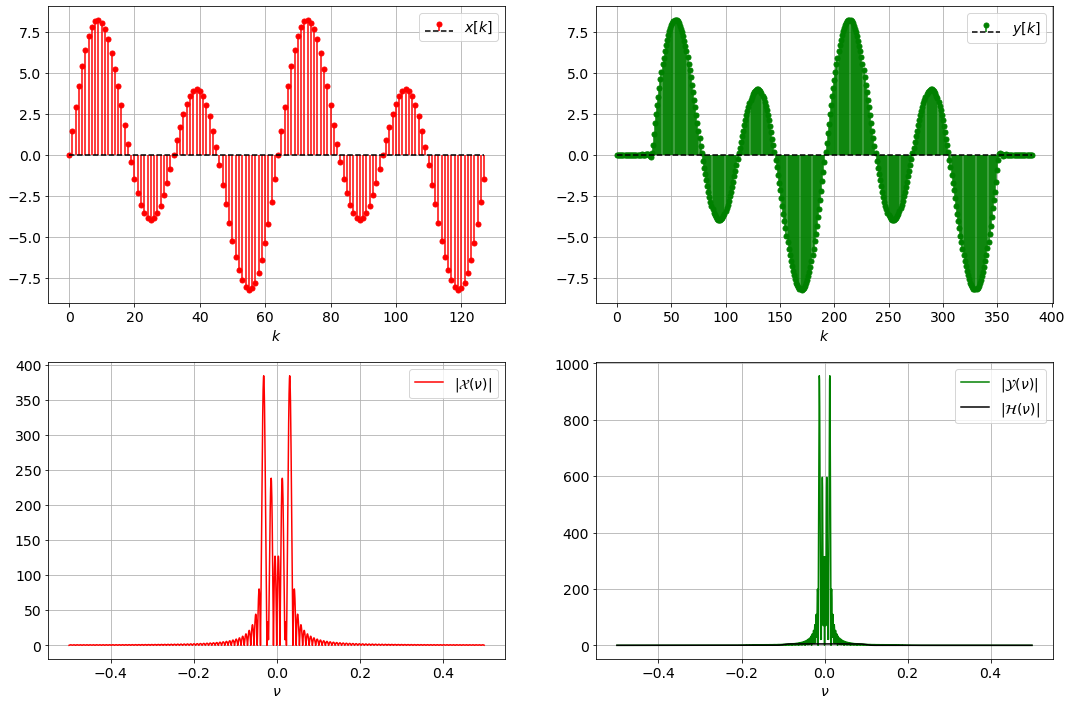

In [12]:
k = np.arange(N)
x = 3*np.sin(2*np.pi*1./64*k) + 6*np.sin(2*np.pi*2./64*k)
y = signal.upfirdn(h, x, up=L, down=M)

plt.subplots(2, 2, figsize=(18, 12))
plt.subplot(2, 2, 1)
ml, sl, bl = plt.stem(np.arange(x.size), x, 'r', basefmt = 'k--', markerfmt = 'o' + 'r', label='$x[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(2, 2, 2)
ml, sl, bl = plt.stem(np.arange(y.size), y, 'g', basefmt = 'k--', markerfmt = 'o' + 'g', label='$y[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu, H = dtft(h)
nu_x, X = dtft(x)
nu_y, Y = dtft(y)


plt.subplot(2, 2, 3)
plt.plot(nu_x, abs(X), 'r', label='$|\mathcal{X}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')


plt.subplot(2, 2, 4)
plt.plot(nu_y, abs(Y), 'g', label='$|\mathcal{Y}(\\nu)|$')
plt.plot(nu, abs(H), 'k', label='$|\mathcal{H}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()
## f_s' = f_s*L/M = 2.5*200=500, T_s' = 1/f_s' = 1/500

#  Модуль 3. Особенности реализации многоскоростных систем.

## Задача 3.1. Полифазные структуры многоскоростных систем.

Промоделируйте работу системы однократной интерполяции с коэффицентом $L=4$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 31$, $\nu_1=5/32$, $\nu_2=2\nu_1$ с помощью функции ``scipy.signal.resample_poly()``

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Постройте графики входного ($x[k]$) и выходного ($y[k]$) сигналов, и модулей их ДВПФ.

2) Изобразите схему данной полифазной структуры однократной интерполяции. 

3) Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 


<img src="img/poly.png" style="height:500px">

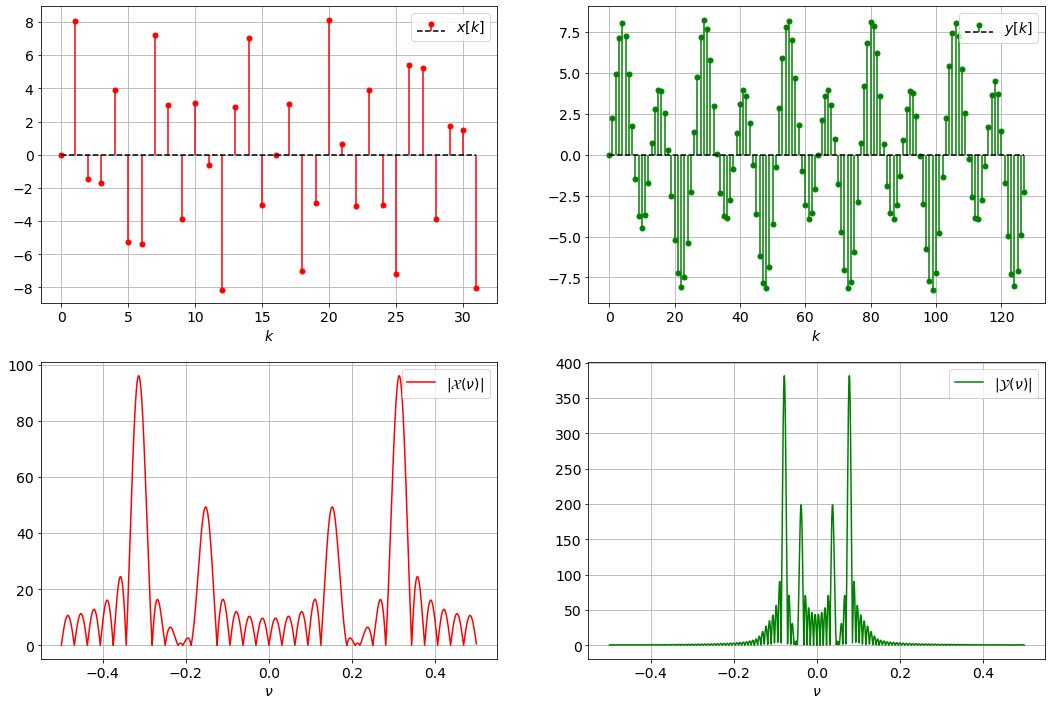

In [13]:
f_s = 200
L = 4
M = 1
N = 32
k = np.arange(N)
x = 3*np.sin(2*np.pi*5/32*k) + 6*np.sin(2*np.pi*10/32*k)

y = signal.resample_poly(x, L, M)

plt.subplots(2, 2, figsize=(18, 12))
plt.subplot(2, 2, 1)
ml, sl, bl = plt.stem(np.arange(x.size), x, 'r', basefmt = 'k--', markerfmt = 'o' + 'r', label='$x[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

plt.subplot(2, 2, 2)
ml, sl, bl = plt.stem(np.arange(y.size), y, 'g', basefmt = 'k--', markerfmt = 'o' + 'g', label='$y[k]$', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$k$')

nu_x, X = dtft(x)
nu_y, Y = dtft(y)


plt.subplot(2, 2, 3)
plt.plot(nu_x, abs(X), 'r', label='$|\mathcal{X}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')


plt.subplot(2, 2, 4)
plt.plot(nu_y, abs(Y), 'g', label='$|\mathcal{Y}(\\nu)|$')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('$\\nu$')

plt.show()
## f_s' = L*f_s = 400, T_s' = 1/f_s' = 1/400

## Задача 3.2. CIC-фильтры.

Постройте импульсную характеристику и АЧХ (в дБ) CIC-фильтра, состоящего из $Q$ последовательно соединенных каскадов, в каждом из которых длина импульсной характеристики равна $N$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $N$ |16 | 16 | 16 | 12 | 12 | 12 |
| $Q$ | 3 | 4 | 5 | 3 | 4 | 5 |

Определите максимальный уровень пульсаций фильтра в полосе пропускания (по максимальному уровню бокового лепестка относительно главного). 





/home/despair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


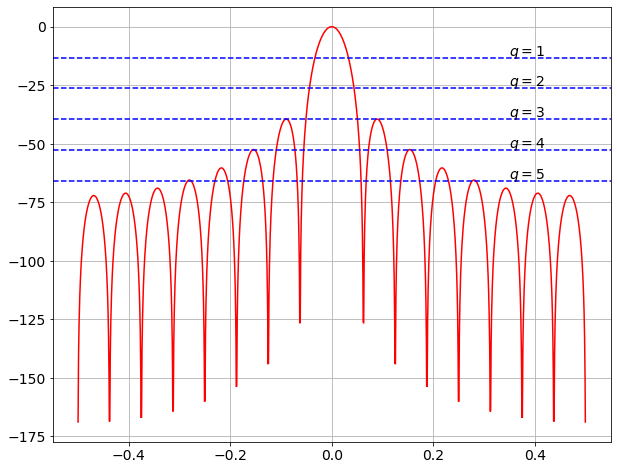

In [14]:
N = 16
Q = 3

h0 = np.ones(N)
h = h0
for q in range(1, Q):
    h = np.convolve(h, h0)

nu, H = dtft(h)

plt.figure(figsize=(10, 8))
plt.plot(nu, 20*np.log10(abs(H)/max(abs(H))), 'r', label='$|\mathcal{H}(\nu)|$, $q=3$')

for q in range(1, 6):
    plt.axhline(-13.2*q, ls='--', color='b')
    plt.annotate(f'$q={q}$', (0.35, -13.2*q+1))

plt.grid()
plt.show()